In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img1 = cv2.imread("C:\\Users\\student\\Downloads\\lena.jpg")
img2 = cv2.imread("C:\\Users\\student\\Downloads\\bmw.jpg")

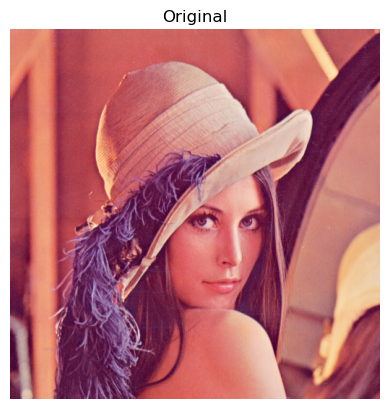

In [3]:
# Convert BGR image to RGB for matplotlib display
lena = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Display the RGB image using matplotlib
plt.axis('off')
plt.imshow(lena)
plt.title('Original')
plt.show()

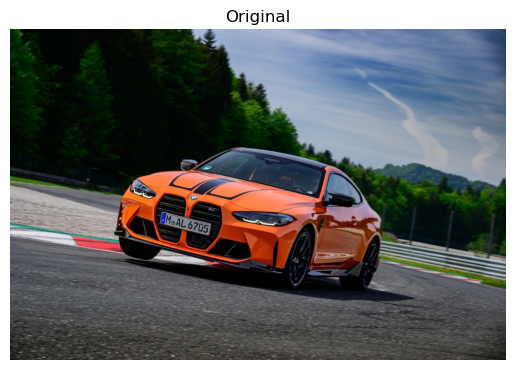

In [4]:
# Convert BGR image to RGB for matplotlib display
car = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the RGB image using matplotlib
plt.axis('off')
plt.imshow(car)
plt.title('Original')
plt.show()

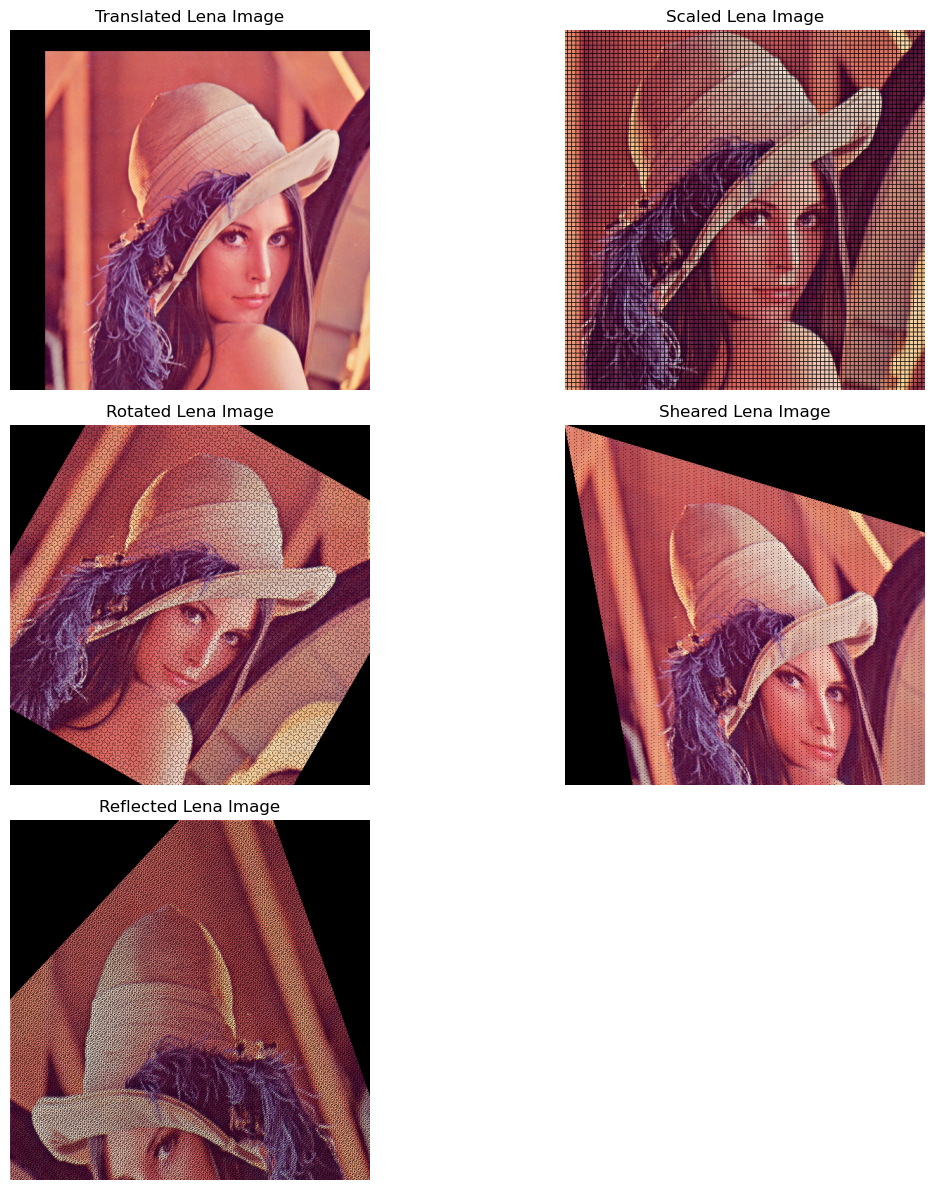

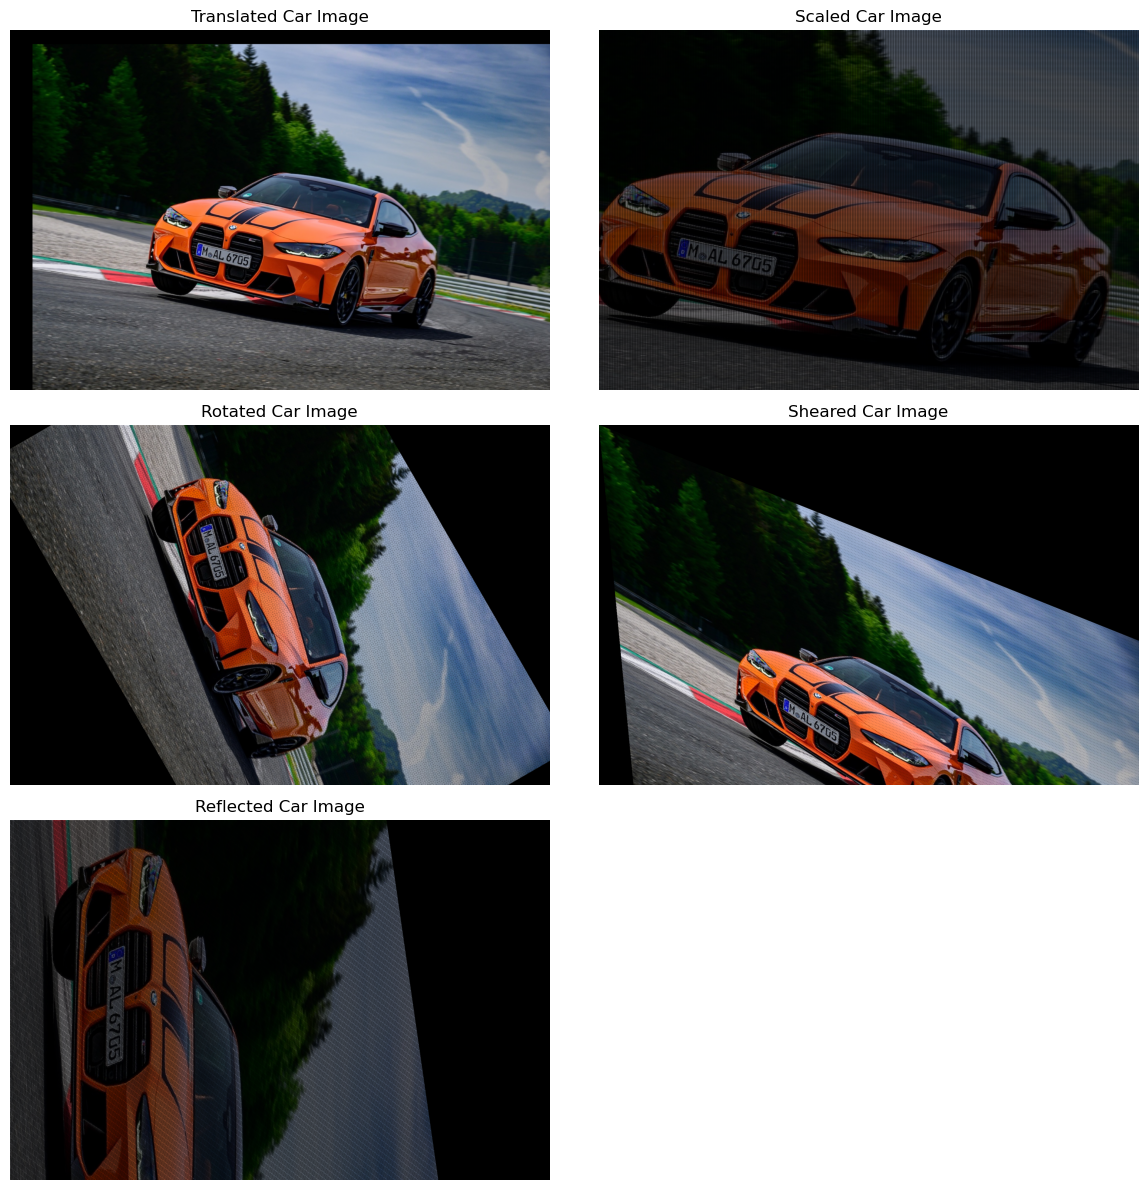

In [ ]:
def transform(image, tx=0, ty=0, angle=0, sx=1, sy=1, shear_x=0, shear_y=0, reflection=False):
    r, c, cha = image.shape  # (height, width, channels)
    tf_image = np.zeros_like(image)  # Initialize the transformed image
    center_x, center_y = c // 2, r // 2  # Image center

    for i in range(r):
        for j in range(c):
            # Apply translation
            n_x = j + tx
            n_y = i + ty

            # Apply scaling
            x_scaled = (n_x - center_x) * sx + center_x
            y_scaled = (n_y - center_y) * sy + center_y

            # Apply shear
            x_sheared = x_scaled + shear_x * y_scaled
            y_sheared = y_scaled + shear_y * x_sheared

            # Apply rotation
            x_rotated = (x_sheared - center_x) * np.cos(np.radians(angle)) - (y_sheared - center_y) * np.sin(np.radians(angle)) + center_x
            y_rotated = (x_sheared - center_x) * np.sin(np.radians(angle)) + (y_sheared - center_y) * np.cos(np.radians(angle)) + center_y

            # Apply reflection 
            if reflection:
                # Reflect (x-axis)
                x_rotated = c - x_rotated
               
            # Ensure the coordinates are within bounds
            if 0 <= int(x_rotated) < c and 0 <= int(y_rotated) < r:
                for ch in range(cha):  # Apply the transformation for all color channels
                    tf_image[int(y_rotated), int(x_rotated), ch] = image[i, j, ch]
    
    return tf_image

def atransform(image, tx=0, ty=0, angle=0, sx=1, sy=1, shear_x=0, shear_y=0, reflection=False):
    # Apply individual transformations
    tl_image = transform(image, tx, ty, angle=0, sx=1, sy=1, shear_x=0, shear_y=0, reflection=False)
    sc_image = transform(image, tx=0, ty=0, angle=0, sx=sx, sy=sy, shear_x=0, shear_y=0, reflection=False)
    r_image = transform(image, tx=0, ty=0, angle=angle, sx=1, sy=1, shear_x=0, shear_y=0, reflection=False)
    sh_image = transform(image, tx=0, ty=0, angle=0, sx=1, sy=1, shear_x=shear_x, shear_y=shear_y, reflection=False)
    refl_image = transform(image, tx=tx, ty=ty, angle=angle, sx=sx, sy=sy, shear_x=shear_x, shear_y=shear_y, reflection=reflection)
    
    return tl_image, sc_image, r_image, sh_image, refl_image

# Example usage
image1 = cv2.imread("C:\\Users\\student\\Downloads\\lena.jpg")
image2 = cv2.imread("C:\\Users\\student\\Downloads\\bmw.jpg")

# Convert BGR to RGB 
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Set transformation parameter(Lena)
tx1, ty1 = 50, 30  # Translation
angle1 = 30  # Rotation
sx1, sy1 = 1.2, 1.2  # Scaling 
shear_x1, shear_y1 = 0.2, 0.3  # Shearing
reflection1 = True  # Apply reflection 

# Set transformation parameters(Car)
tx2, ty2 = 80, 50  # Translation
angle2 = 60  # Rotation
sx2, sy2 = 1.8, 1.5  # Scaling
shear_x2, shear_y2 = 0.1, 0.4  # Shearing
reflection2 = False  # No reflection 

# Apply transformations manually to both images
tl_image1, sc_image1, r_image1, sh_image1, refl_image1 = atransform(image1, tx1, ty1, angle1, sx1, sy1, shear_x1, shear_y1, reflection1)
tl_image2, sc_image2, r_image2, sh_image2, refl_image2 = atransform(image2, tx2, ty2, angle2, sx2, sy2, shear_x2, shear_y2, reflection2)

# Image 1 (Lena)
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(tl_image1) 
plt.title("Translated Lena Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(sc_image1)  
plt.title("Scaled Lena Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(r_image1)  
plt.title("Rotated Lena Image")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(sh_image1)  
plt.title("Sheared Lena Image")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(refl_image1)  
plt.title("Reflected Lena Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Image 2 (Car)
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(tl_image2)  
plt.title("Translated Car Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(sc_image2)  
plt.title("Scaled Car Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(r_image2)  
plt.title("Rotated Car Image")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(sh_image2)  
plt.title("Sheared Car Image")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(refl_image2)  
plt.title("Reflected Car Image")
plt.axis('off')

plt.tight_layout()
plt.show()
